In [42]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator  # Neu: AerSimulator statt Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
import numpy as np

     ┌───┐          ┌───┐┌─┐
q_0: ┤ H ├───────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐└───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├──────╫─
     └───┘└───┘└───┘      ║ 
c: 1/═════════════════════╩═
                          0 


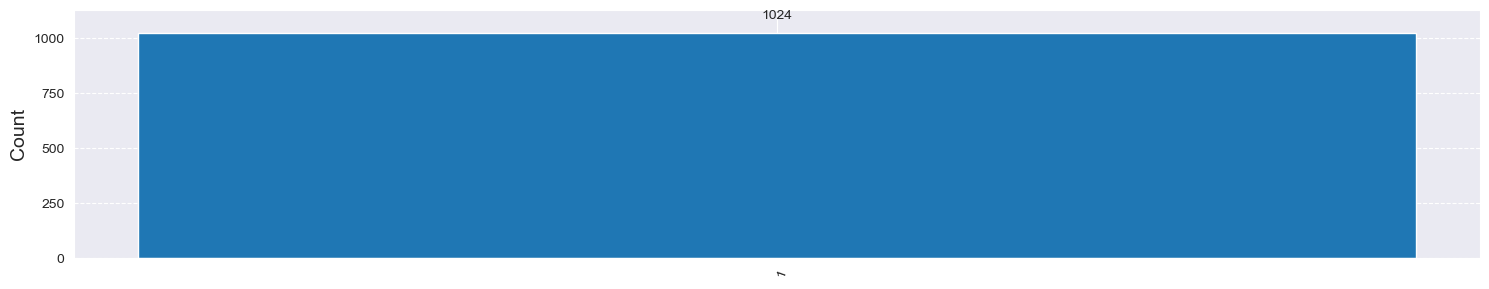

In [39]:
# Deutsch-Jozsa-Algorithmus

# Schaltkreis für 1-Qubit-Deutsch-Jozsa
qc = QuantumCircuit(2, 1)

# Superposition + Oracle (balanciert: CNOT)
qc.h(0)
qc.x(1)
qc.h(1)
qc.cx(0, 1)  # Balanciertes Oracle
qc.h(0)
qc.measure(0, 0)

# Simulation mit AerSimulator
simulator = AerSimulator()
job = simulator.run(qc)
result = job.result()
counts = result.get_counts()

# Visualisierung
print(qc.draw(output='text'))  # ASCII-Schaltkreis
plot_histogram(counts)

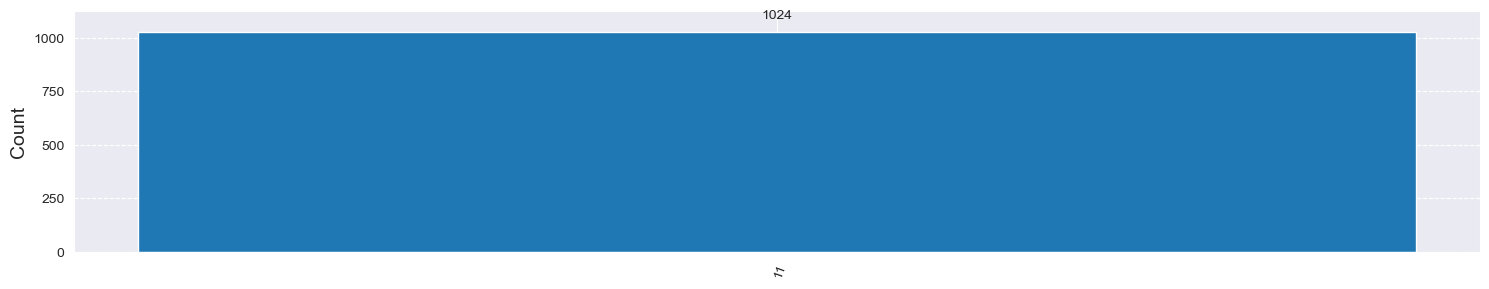

In [41]:
# Grover Algorithmus

# Schaltkreis für 2 Qubits (sucht |11>)
qc = QuantumCircuit(2)

# Superposition
qc.h([0, 1])

# Oracle (markiert |11>)
qc.cz(0, 1)  # Neu: Direktes CZ-Gatter statt zusammengesetztem Oracle

# Diffusor
qc.h([0, 1])
qc.x([0, 1])
qc.h(1)
qc.cx(0, 1)
qc.h(1)
qc.x([0, 1])
qc.h([0, 1])

# Messung
qc.measure_all()

# Simulation
simulator = AerSimulator()
result = simulator.run(qc).result()
plot_histogram(result.get_counts())  # Dominantes |11> erwartet

C:\Users\juanc\AppData\Local\Temp\ipykernel_9580\1112850365.py:18: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(4, inverse=True).to_instruction(), qc.qubits)


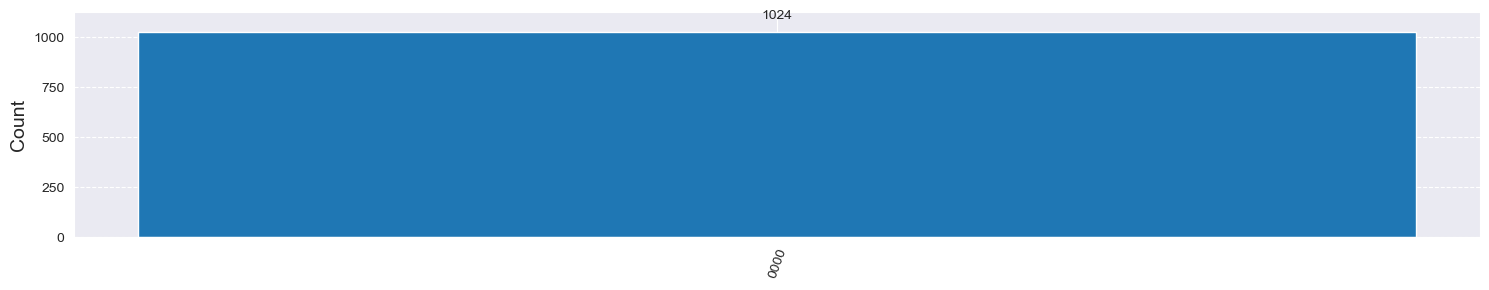

In [46]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Schaltkreis für N=15, a=7 (4 Qubits)
qc = QuantumCircuit(4, 4)

# Superposition
qc.h(range(4))

# Modulare Exponentiation (vereinfacht)
qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(2, 3)

# Inverse QFT (transpilieren!)
qc.append(QFT(4, inverse=True).to_instruction(), qc.qubits)

# Messung
qc.measure(range(4), range(4))

# Transpilieren für AerSimulator
qc = transpile(qc, AerSimulator())

# Simulation
simulator = AerSimulator()
result = simulator.run(qc).result()
plot_histogram(result.get_counts())